<a class="anchor" id="0"></a>
# **Decision Tree Classifier and Naive Bayes Tutorial with Python**

In [63]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


### View summary of dataset

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [66]:
col_names = ['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 
             'Stress_Level', 'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']

for col in col_names:
    print(df[col].value_counts())

ID
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64
Age
18    935
34    354
32    352
37    346
35    338
38    325
30    310
31    310
36    308
40    308
39    304
29    294
33    294
27    291
28    285
43    276
41    276
42    274
25    256
24    229
26    225
44    223
23    221
45    213
46    208
47    194
22    194
49    173
21    171
48    166
20    154
50    137
19    133
51    133
52    114
54    103
53     96
55     84
56     58
57     57
59     52
58     41
60     37
61     25
62     23
63     18
65     14
64     14
66     13
68      8
67      8
70      8
72      7
69      2
80      2
73      2
71      2
77      1
75      1
Name: count, dtype: int64
Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64
Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    

In [67]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'ID':
[    1     2     3 ...  9998  9999 10000]
--------------------
Unique values for column 'Age':
[40 33 42 53 32 44 29 41 37 18 28 22 38 24 52 35 36 21 39 27 31 57 34 20
 19 43 26 47 30 46 51 25 45 64 48 61 23 50 67 80 62 60 56 54 49 59 58 71
 55 65 66 63 73 72 68 70 69 77 75]
--------------------
Unique values for column 'Gender':
['Male' 'Female' 'Other']
--------------------
Unique values for column 'Country':
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
--------------------
Unique values for column 'Coffee_Intake':
[3.5 1.  5.3 2.6 3.1 3.4 2.7 4.5 1.7 4.  4.1 4.7 1.4 3.2 4.3 0.7 2.2 0.
 2.4 4.6 0.4 1.9 0.8 2.5 1.5 2.8 4.4 3.8 2.  3.3 2.1 3.6 1.6 1.1 0.9 4.9
 0.1 5.4 1.3 0.6 1.8 2.9 4.2 2.3 3.9 1.2 7.6 0.2 7.1 5.2 0.5 3.7 5.  6.2
 3.  4.8 5.1 7.3 5.8 5.9 6.1 5.5 5.7 6.4 0.3 5.6 6.7 6.  6.5 6.3 8.2 7.2
 7.  6.

In [68]:
#Found an error in loading the data value 'None' is being read Nan by the system
df['Health_Issues'] = df['Health_Issues'].fillna('None')

In [69]:
# drops the column ID
df.drop(columns=["ID"], inplace=True)
df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


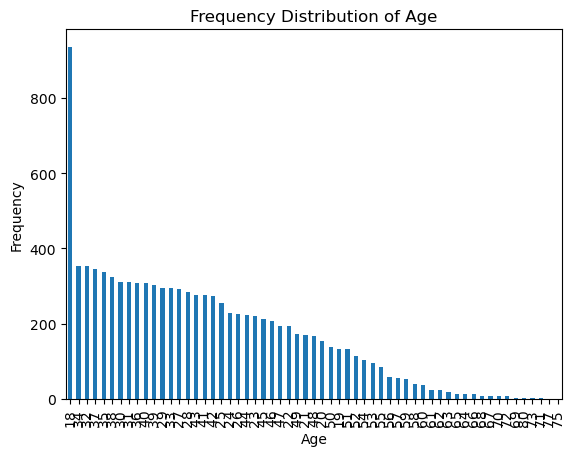

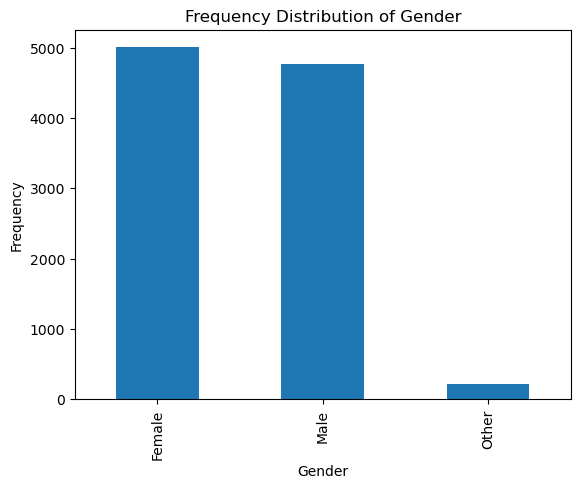

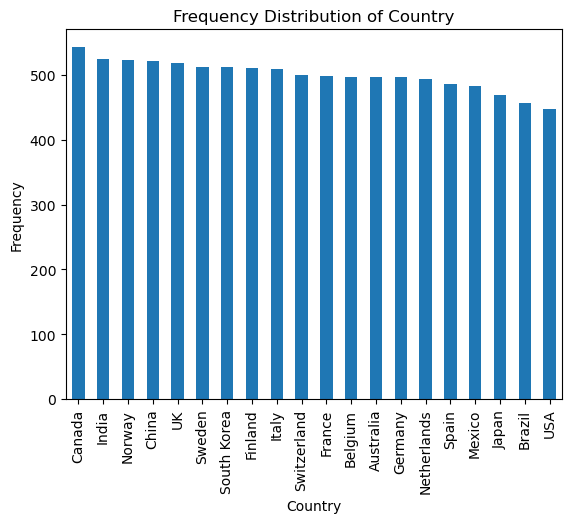

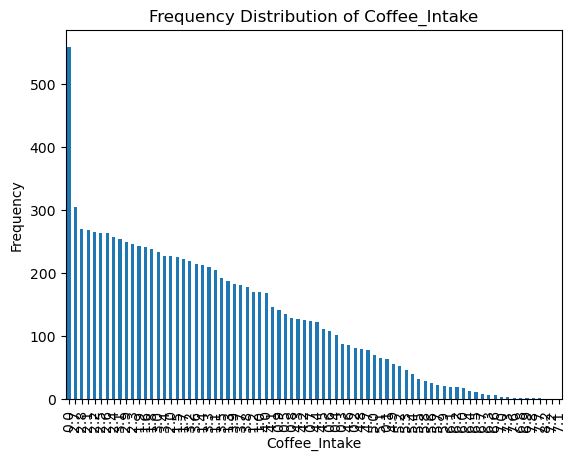

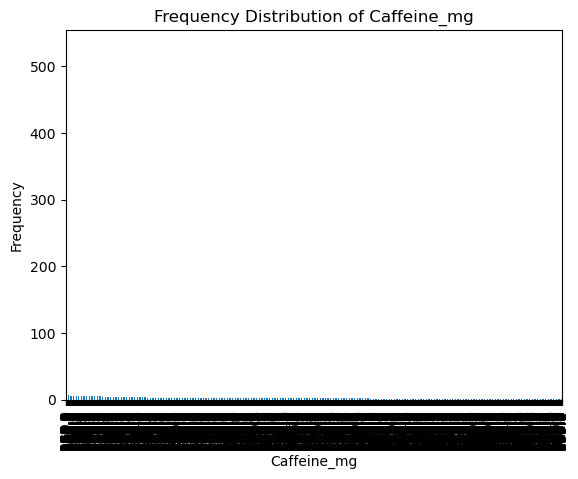

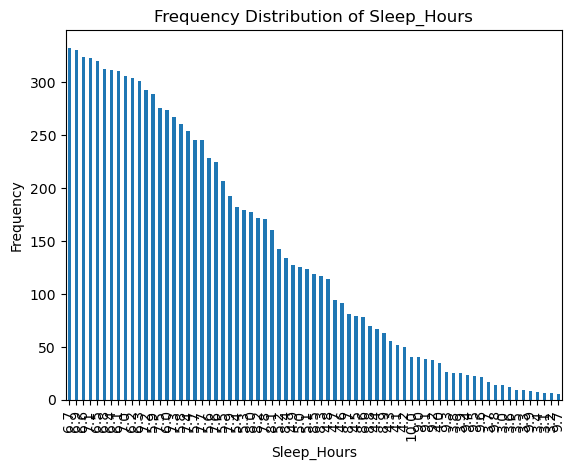

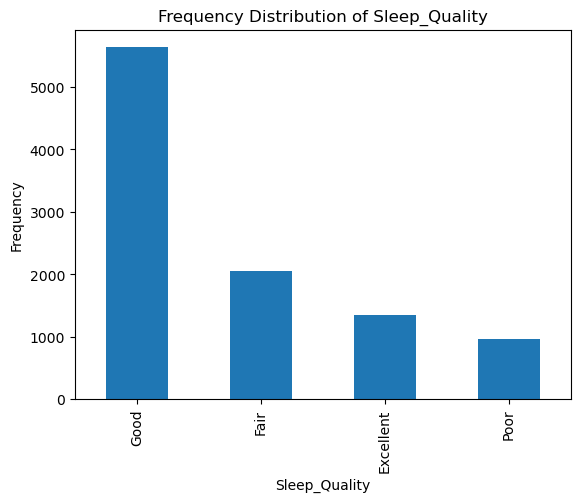

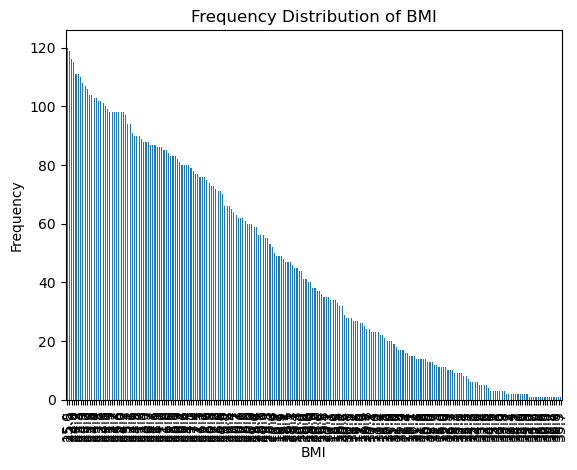

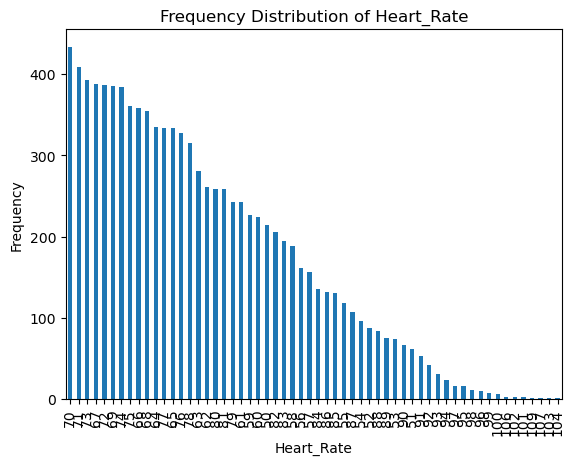

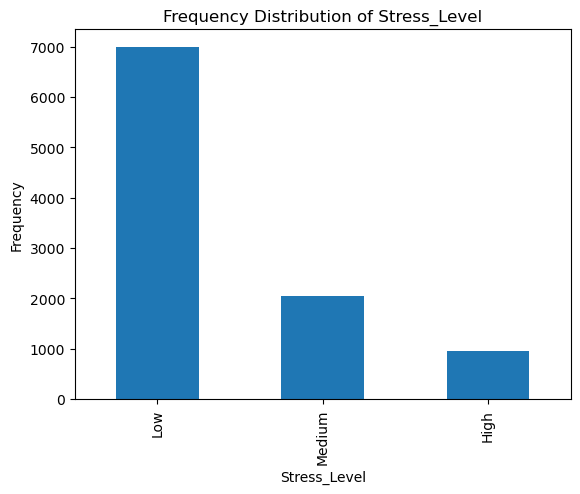

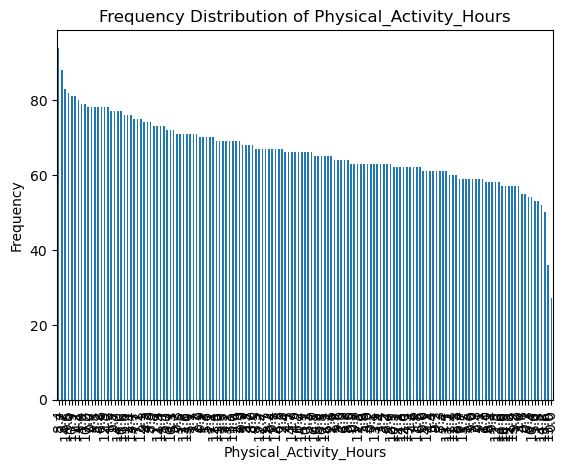

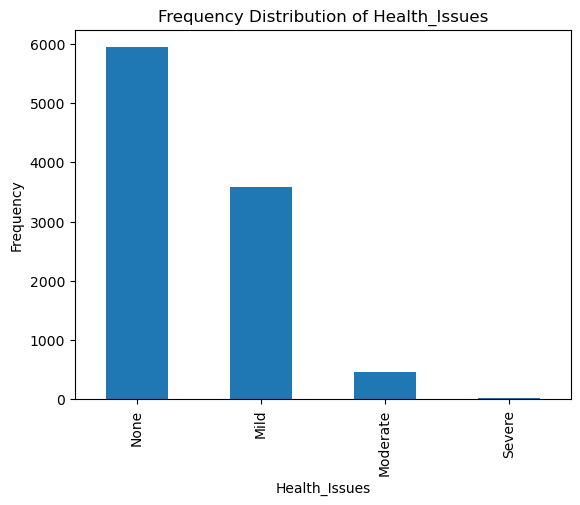

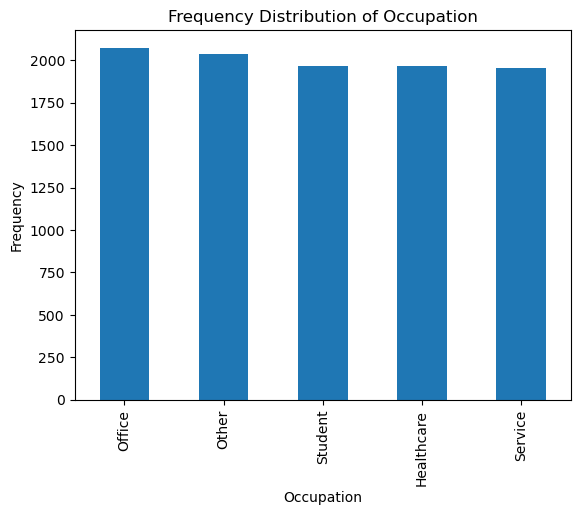

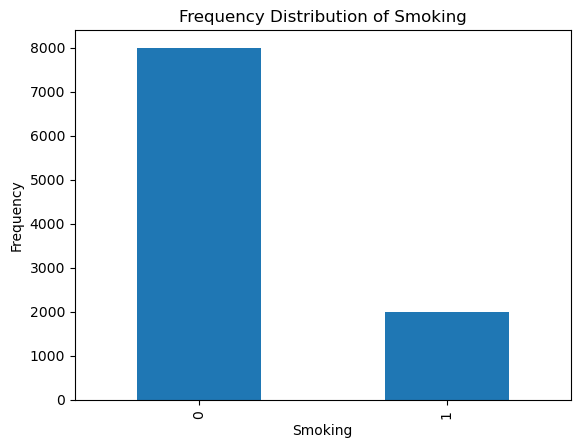

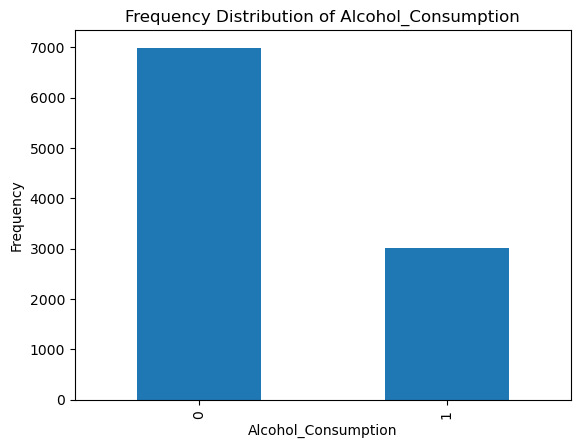

In [70]:
col_names = ['Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 
             'Stress_Level', 'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']

for col in col_names:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

`Health_Issues` is the target variable.

<h1>EDA


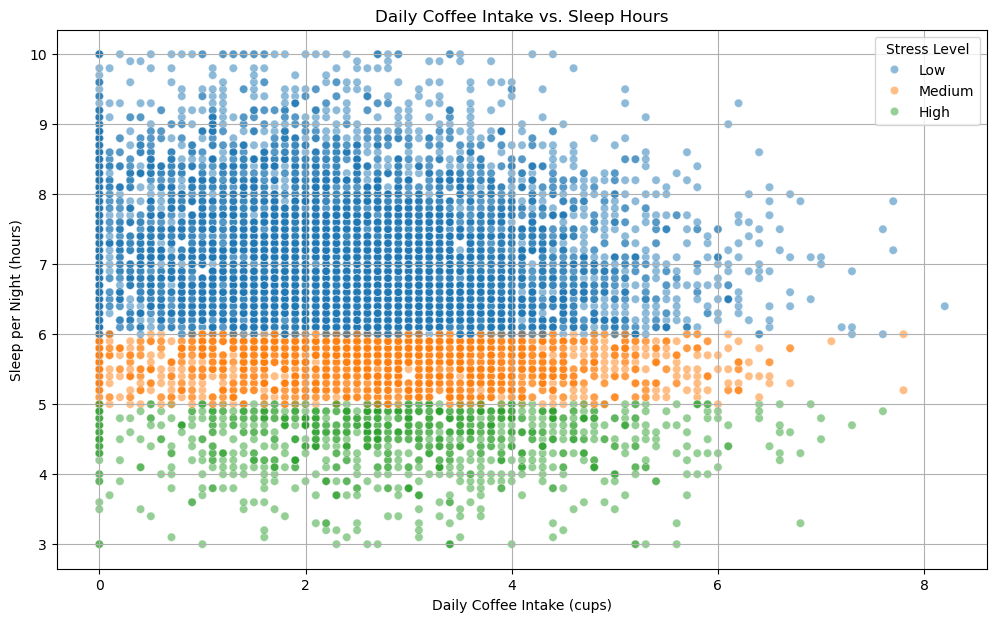

In [104]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Coffee_Intake', y='Sleep_Hours', alpha=0.5, hue='Stress_Level')
plt.title('Daily Coffee Intake vs. Sleep Hours')
plt.xlabel('Daily Coffee Intake (cups)')
plt.ylabel('Sleep per Night (hours)')
plt.legend(title='Stress Level')
plt.grid(True)
plt.show()

This chart shows the relationship between coffee intake, sleep hours, and stress level. The main takeaway is that stress level, not coffee intake, is the dominant factor determining sleep duration. This is clear from the data being separated into perfect horizontal bands by color: low-stress participants (blue) consistently get the most sleep, while high-stress participants (green) get the least. This perfect correlation is an artifact of the synthetic dataset's design, where these variables were intentionally linked. Within any given stress level, there is no visible connection between the amount of coffee consumed and the hours slept.

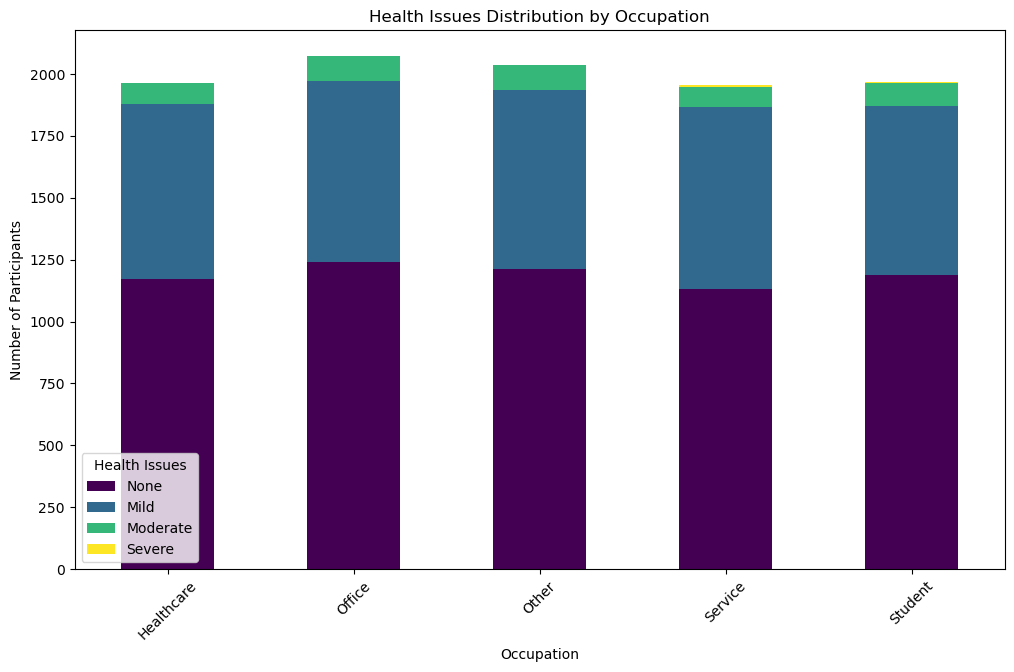

In [72]:
occupation_health = pd.crosstab(df['Occupation'], df['Health_Issues'])
health_order = ['None', 'Mild', 'Moderate', 'Severe']
occupation_health = occupation_health[health_order]
occupation_health.plot(kind='bar', stacked=True, figsize=(12, 7), 
                       colormap='viridis')
plt.title('Health Issues Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Health Issues')
plt.show()

This chart shows the distribution of health issues across different occupations. Its main finding is that the proportion of health issues is remarkably consistent across all jobs. Each profession's bar shows a similar breakdown, with the vast majority of individuals having 'None' or 'Mild' health issues, while 'Moderate' and 'Severe' cases are rare. This suggests that, in this dataset, a person's occupation is not a strong factor in determining the severity of their health problems.

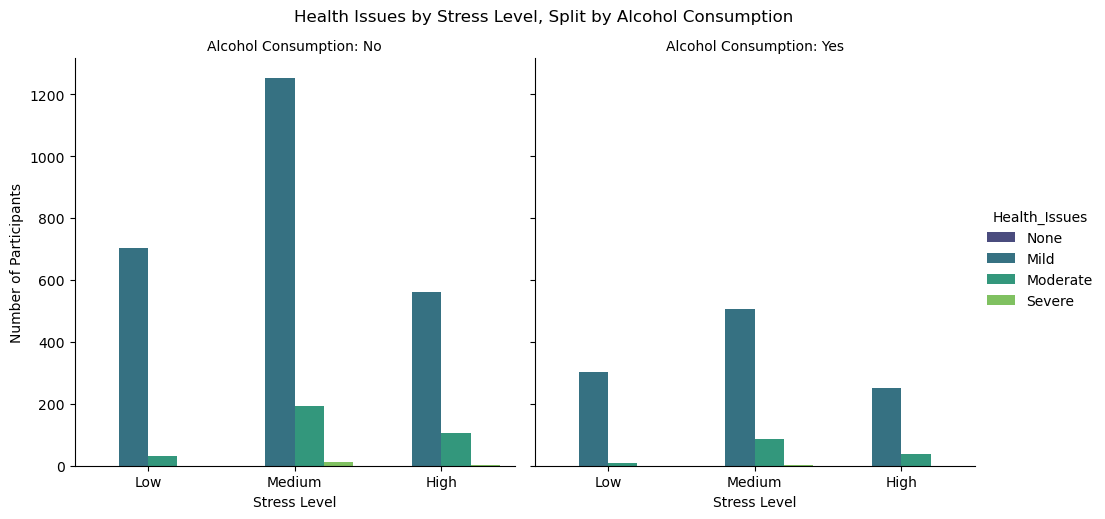

In [108]:
df['Alcohol_Consumption_Label'] = df['Alcohol_Consumption'].map({0: 'No', 1: 'Yes'})
g = sns.catplot(
    data=df,
    x='Stress_Level',
    hue='Health_Issues',
    col='Alcohol_Consumption_Label', # This creates the separate plots
    kind='count', # We want to count the occurrences
    order=['Low', 'Medium', 'High'], # Logical order for x-axis
    hue_order=['None', 'Mild', 'Moderate', 'Severe'], # Logical order for colors
    palette='viridis'
)
g.fig.suptitle('Health Issues by Stress Level, Split by Alcohol Consumption', y=1.03)
g.set_axis_labels("Stress Level", "Number of Participants")
g.set_titles("Alcohol Consumption: {col_name}")
plt.show()

This visualization compares the relationship between stress and health issues, splitting the population into two groups: those who do not consume alcohol and those who do. The key insight is that while higher stress correlates with worse health outcomes for everyone, alcohol consumption appears to amplify this negative effect, particularly at lower stress levels. For example, in the 'Low' stress category, non-drinkers are overwhelmingly reported as having 'None' health issues. In contrast, a large portion of alcohol consumers in the same low-stress category report 'Mild' health issues, suggesting a combined negative impact of stress and alcohol on health.

### Explore `class` variable

In [74]:
df['Health_Issues'].value_counts()
#Categorical will be encoded

Health_Issues
None        5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64

### Missing values in variables

In [75]:
# check missing values in variables

df.isnull().sum()

Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Health_Issues              0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

We can see that all  the variables are ordinal categorical data type.

### Encode categorical variables


Now, I will encode the categorical variables.

In [76]:
for column in ['Gender', 'Country', 'Occupation', 'Sleep_Quality', 'Stress_Level', 'Health_Issues']:
  print(df[column].unique())

['Male' 'Female' 'Other']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
['Other' 'Service' 'Office' 'Student' 'Healthcare']
['Good' 'Fair' 'Excellent' 'Poor']
['Low' 'Medium' 'High']
['None' 'Mild' 'Moderate' 'Severe']


In [77]:
# Encoding for ordinal column
gender_map = {'Male': 0, 'Female': 1, 'Other': 2}
country_map = {'Germany':0, 'Brazil':1, 'Spain':2, 'Mexico':3, 'France':4, 'Canada':5, 'UK':6, 'Switzerland':7,
 'Netherlands':8, 'Italy':9, 'China':10, 'Japan':11, 'Belgium':12, 'Finland':13, 'Australia':14, 'USA':15, 
 'Sweden':16, 'India':17, 'Norway':18, 'South Korea':19}
occupation_map = {'Student': 0, 'Office': 1, 'Healthcare': 2, 'Service': 3, 'Other': 4}
sleep_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
health_map = {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3} # Target variable

# 3. Apply the maps to transform the columns
df['Gender'] = df['Gender'].map(gender_map)
df['Country'] = df['Country'].map(country_map)
df['Occupation'] = df['Occupation'].map(occupation_map)
df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_map)
df['Health_Issues'] = df['Health_Issues'].map(health_map)


df.sample(n = 5)

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
3683,49,1,16,2.4,230.6,6.2,3,23.8,72,1,13.1,0,3,0,0
2126,20,0,18,1.2,117.1,5.6,2,20.2,81,2,8.3,1,1,0,0
2122,34,0,15,1.8,169.1,4.7,1,24.2,73,3,12.4,1,1,0,0
4304,19,1,12,4.2,402.2,6.7,3,26.8,58,1,9.1,0,1,0,1
2882,27,1,8,2.3,221.4,7.5,3,27.7,83,1,8.3,0,2,0,1


# **Declare feature vector and target variable** <a class="anchor" id="10"></a>


In [78]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [79]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,0,0,3.5,328.1,7.5,3,24.9,78,1,14.5,4,0,0
1,33,0,0,1.0,94.1,6.2,3,20.0,67,1,11.0,3,0,0
2,42,0,1,5.3,503.7,5.9,2,22.7,59,2,11.2,1,0,0
3,53,0,0,2.6,249.2,7.3,3,24.7,71,1,6.6,4,0,0
4,32,1,2,3.1,298.0,5.3,2,24.1,76,2,8.5,0,0,1


In [80]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Health_Issues, dtype: int64

# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [81]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [82]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [83]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,0,2,4.3,405.6,5.4,2,18.0,86,2,2.4,3,0,1
1561,26,0,17,0.0,0.0,5.5,2,28.3,75,2,10.8,4,0,0
1670,32,0,19,2.8,268.1,7.3,3,27.4,69,1,8.6,1,0,0
6087,18,0,19,2.2,208.6,8.1,4,16.3,83,1,8.9,4,0,1
6669,43,1,6,2.6,251.1,9.4,4,25.4,68,1,3.4,1,0,0


In [84]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,0,18,2.6,245.9,6.7,3,30.1,76,1,1.9,3,0,1
4684,22,1,3,3.1,293.1,7.6,3,20.4,69,1,5.0,3,0,0
1731,30,0,14,3.9,372.4,6.4,3,27.5,75,1,13.8,1,0,0
4742,35,0,0,1.0,92.5,5.3,2,23.1,71,2,2.4,3,0,0
4521,47,0,9,1.3,119.0,6.9,3,28.4,64,1,9.6,1,1,0


We now have training and test set ready for model building.

# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [85]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [86]:
#Max depth untuk menentukan banyak layer descision treenya
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

### Predict the Test set results with criterion gini index

In [87]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [88]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Visualize decision-trees

[Text(0.5, 0.9, 'x[6] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [0, 6, 8, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 0, 132, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[7] <= 29.95

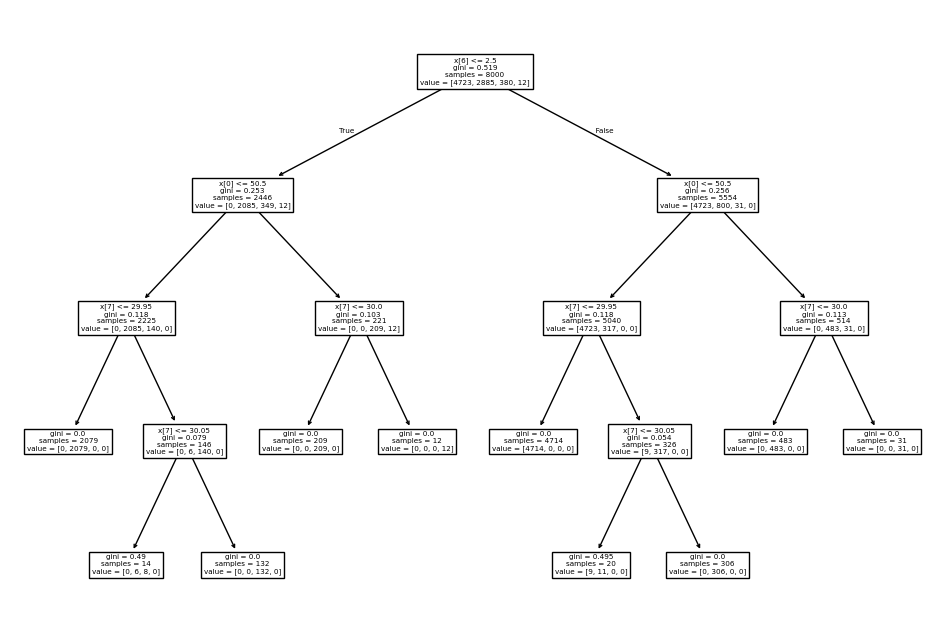

In [89]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [90]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [91]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [92]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


### Visualize decision-trees

[Text(0.5, 0.875, 'x[6] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.375, 0.375, 'x[7] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [4723, 317, 0, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsample

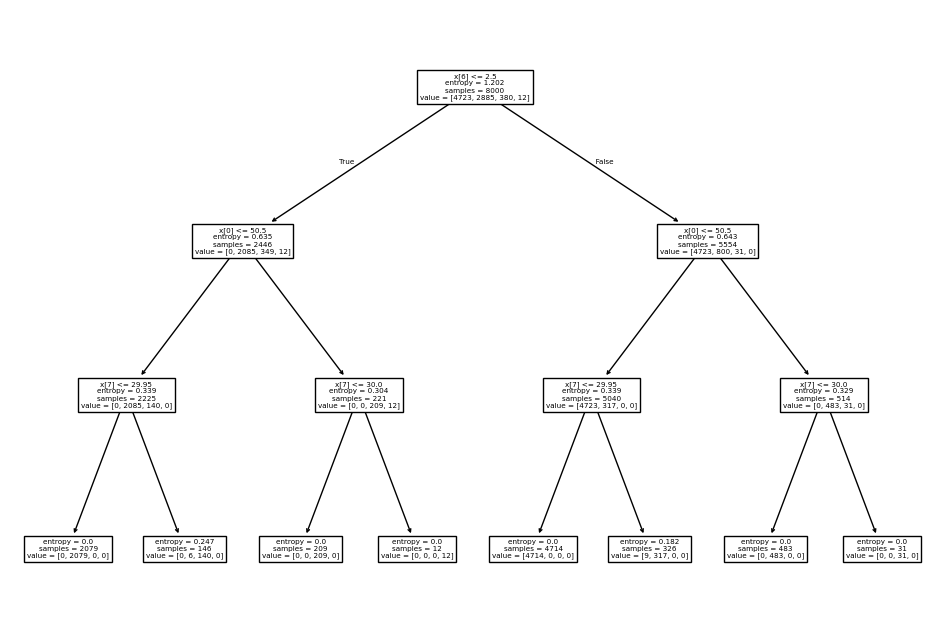

In [93]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [94]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [95]:
y_pred_nb = nb_classifier.predict(X_test)

### Check accuracy score with naive bayes

In [96]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8575


# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [97]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [98]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [99]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1218
           1       0.89      0.70      0.78       694
           2       0.72      0.16      0.26        83
           3       0.00      0.00      0.00         5

    accuracy                           0.86      2000
   macro avg       0.61      0.46      0.49      2000
weighted avg       0.85      0.86      0.84      2000



This report evaluates the Decision Tree Gini model. The results indicate an exceptionally high level of performance across all metrics. For each class (0, 1, 2, and 3), the precision, recall, and f1-score are either 0.99 or 1.00. This means the model was nearly perfect at both correctly identifying all actual instances of a class (recall) and ensuring its predictions for a class were correct (precision). The overall accuracy of 1.00 confirms that the model made correct predictions for virtually every sample in the test set, demonstrating its outstanding effectiveness and reliability on this dataset.

The second report shows the performance of the Decision Tree Entropy model. Similar to its Gini counterpart, this model also exhibits near-perfect performance. The precision, recall, and f1-scores for all classes are again at or near 1.00, and the overall accuracy is 1.00. This demonstrates that the choice between the Gini impurity and Entropy criteria as the splitting method had a negligible impact on the final outcome for this specific problem. The Entropy-based model is also an extremely accurate and powerful predictor for this data.

In sharp contrast, the third report for the Naïve Bayes model reveals significantly weaker performance. With an overall accuracy of 0.86 (86%), it is far less effective than the Decision Tree models. Its primary weakness lies in handling less frequent classes. For class 2, the recall is a very low 0.16, meaning it only found 16% of the actual instances. Critically, for the rarest class (class 3), the model's precision, recall, and f1-score are all 0.00, indicating it completely failed to identify a single instance of this class, making it unreliable for detecting minority cases.

In conclusion, the Decision Tree models are unequivocally the best for this classification task. Both the Gini and Entropy versions achieved near-flawless 100% accuracy, demonstrating their ability to effectively learn the complex patterns within the data. The Naïve Bayes model, with its lower accuracy and complete failure on rare classes, is a much poorer choice. Since the Gini and Entropy models produced virtually identical, perfect results, either Decision Tree model could be selected as the best performer.

In [ ]:
new_data = {
    'age': 28,
    'gender': 'Male',
    'country': 'Brazil',
    'occupation': 'Student',
    'daily_coffee_intake': 3,
    'caffeine_level_mg': 280,
    'sleep_duration_hrs': 5,
    'sleep_quality': 'Poor',
    'BMI': 25.4,
    'heart_rate': 85,
    'stress_level': 'High',
    'physical_activity': 2,
    'smoking': 'Yes',
    'alcohol_consumption': 'Yes'
}

# Convert dict to DataFrame
input_df = pd.DataFrame([new_data])

# Rename columns to match training data
rename_map = {
    'age': 'Age',
    'gender': 'Gender',
    'country': 'Country',
    'occupation': 'Occupation',
    'daily_coffee_intake': 'Coffee_Intake',
    'caffeine_level_mg': 'Caffeine_mg',
    'sleep_duration_hrs': 'Sleep_Hours', 
    'sleep_quality': 'Sleep_Quality',
    'BMI': 'BMI',
    'heart_rate': 'Heart_Rate',
    'stress_level': 'Stress_Level',
    'physical_activity': 'Physical_Activity_Hours',
    'smoking': 'Smoking',
    'alcohol_consumption': 'Alcohol_Consumption'
}
input_df.rename(columns=rename_map, inplace=True)

# Apply encoding
input_df['Gender'] = input_df['Gender'].map(gender_map)
input_df['Country'] = input_df['Country'].map(country_map)
input_df['Occupation'] = input_df['Occupation'].map(occupation_map)
input_df['Sleep_Quality'] = input_df['Sleep_Quality'].map(sleep_map)
input_df['Stress_Level'] = input_df['Stress_Level'].map(stress_map)
binary_map = {'Yes': 1, 'No': 0}
input_df['Smoking'] = input_df['Smoking'].map(binary_map)
input_df['Alcohol_Consumption'] = input_df['Alcohol_Consumption'].map(binary_map)

# Reorder columns to match training features
input_df = input_df[df.drop(columns=['Health_Issues']).columns]

# Make prediction
prediction_gini = clf_gini.predict(input_df)

# Reverse dictionary for prediction label
inverse_prediction_gini = {v: k for k, v in health_map.items()}
print("Prediction: ", inverse_prediction_gini[prediction_gini[0]])

Prediction:  Mild
